In [ ]:
# google colab の場合は、この下のコメントアウトを外す
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds09_SN_y_tot_V2.0.csv
# ! pip install statsmodels==0.13.1

In [9]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

0.13.1


In [2]:
# 太陽黒点数のCSVファイルは以下からダウンロード (20220113)
# https://wwwbis.sidc.be/silso/datafiles

# 太陽黒点数のCSVファイルを読み込みデータフレームに格納
index = []
sunspot = []
column = ['sunspot']
with open('ds09_SN_y_tot_V2.0.csv') as f:  # ヘッダ行なし
    reader = csv.reader(f, delimiter=';')  # デリミタはセミコロン
    for row in reader:
        index.append(f'{int(float(row[0]))}-01-01 00:00:00')  # 第一コラム データの年月
        sunspot.append(float(row[1]))  # 第二コラム 太陽黒点数
sunspot_df = pd.DataFrame(data=sunspot, columns=column)
sunspot_df.index = pd.to_datetime(index)


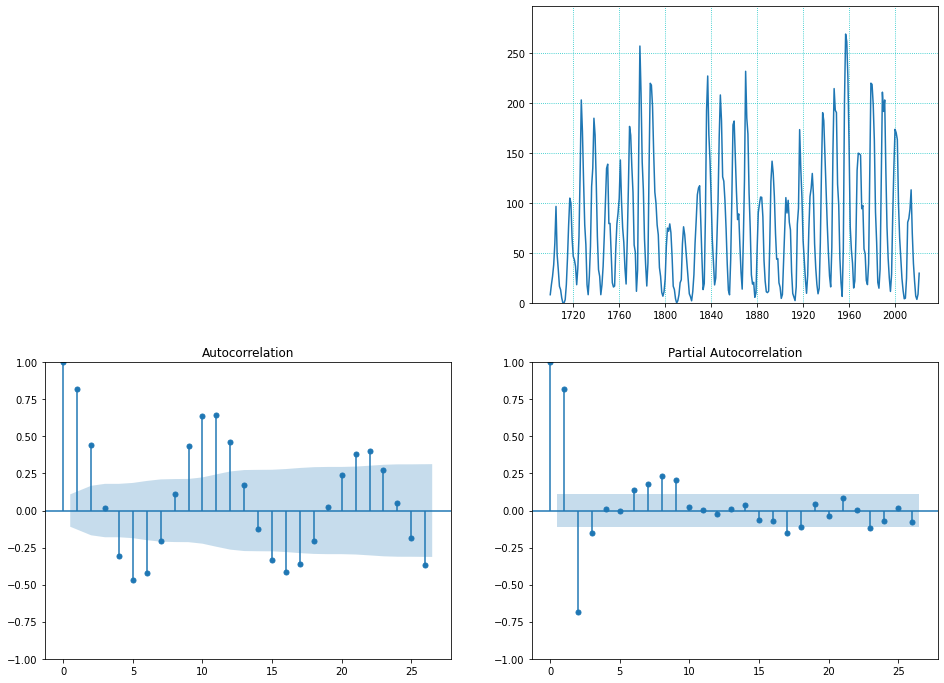

In [3]:
# 太陽黒点数のグラフを表示
fig = plt.figure(figsize=(16, 12))  
ax = fig.add_subplot(222)
ax.plot(sunspot_df)
y_min, y_max = ax.get_ylim()
ax.set_ylim(0, y_max * 1.05)
ax.grid(axis='both',linestyle='dotted', color='c')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y")) 

# 自己相関係数と偏自己相関係数のグラフを表示
ax1 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(sunspot_df, ax=ax1)
ax2 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(sunspot_df, ax=ax2, method='ywm')

In [4]:
result = acorr_ljungbox(sunspot_df['sunspot'].values, lags=12, return_df=True)
print(result)

       lb_stat      lb_pvalue
1   216.805156   4.500732e-49
2   279.641074   1.891091e-61
3   279.747316   2.401648e-60
4   310.907764   4.804224e-66
5   382.175820   2.056807e-80
6   440.998776   4.246747e-92
7   455.063373   3.631195e-94
8   459.368810   3.632941e-94
9   522.581739  8.374169e-107
10  657.645136  7.710943e-135
11  796.817431  9.137704e-164
12  869.092370  2.483148e-178


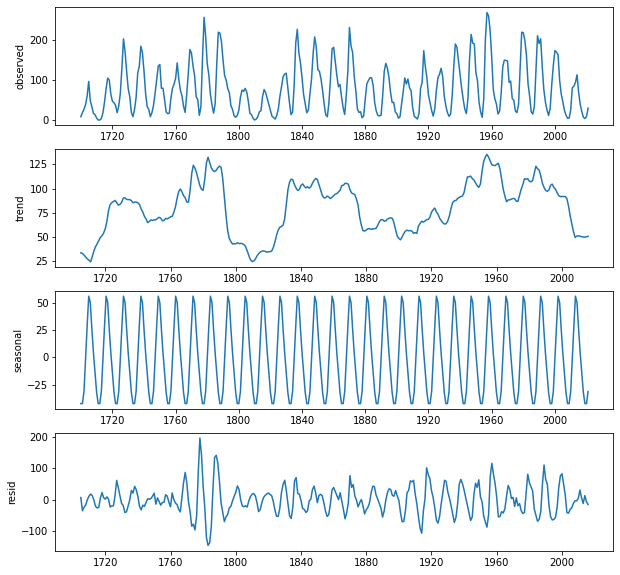

In [5]:
# 時系列データをトレンド、規則的変動成分、不規則変動成分に分解して、グラフに表示
res = sm.tsa.seasonal_decompose(sunspot_df, period=11)  # 11年周期を想定して分解
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(411)
ax1.set_ylabel('observed')
ax1.plot(res.observed)
ax2 = fig.add_subplot(412)
ax2.set_ylabel('trend')
ax2.plot(res.trend)
ax3 = fig.add_subplot(413)
ax3.set_ylabel('seasonal')
ax3.plot(res.seasonal)
ax4 = fig.add_subplot(414)
ax4.set_ylabel('resid')
ax4.plot(res.resid)
